In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-worlds-companies/companies.csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/kaggle/input/top-worlds-companies/companies.csv')

In [5]:
data.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      9908 non-null   object 
 4   Critically_rated_for  2807 non-null   object 
 5   Total_reviews         10000 non-null  object 
 6   Avg_salary            10000 non-null  object 
 7   Interviews_taken      10000 non-null  object 
 8   Total_jobs_available  10000 non-null  object 
 9   Total_benefits        10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


Proceed data cleaning for clean messy data

Convert columns with 'k' to thousands and remove non-numeric characters for numeric conversion

In [7]:
convert_to_thousands = lambda x: pd.to_numeric(x.replace('k', '')) * 1000 if 'k' in str(x) else pd.to_numeric(x, errors='coerce')
columns_to_convert = ['Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']

for col in columns_to_convert:
    data[col] = data[col].apply(convert_to_thousands)

Convert 'Ratings' to numeric

In [8]:
data['Ratings'] = pd.to_numeric(data['Ratings'], errors='coerce')

Check for missing values in the first 10 columns

In [10]:
missing_values = data.iloc[:, :10].isnull().sum()

missing_values

Company_name               0
Description                0
Ratings                    0
Highly_rated_for          92
Critically_rated_for    7193
Total_reviews              0
Avg_salary                 2
Interviews_taken         219
Total_jobs_available    3923
Total_benefits            79
dtype: int64

Read the CSV file and then fill NaN values

Import Library

In [13]:
import pandas as pd

Load dataset from a CSV file

In [14]:
data = pd.read_csv('/kaggle/input/top-worlds-companies/companies.csv')

Fill all NaN values with 0 or any other value you choose

In [16]:
data_filled = data.fillna(0)

In [18]:
print(data_filled)

                       Company_name  \
0                               TCS   
1                         Accenture   
2                         Cognizant   
3                             Wipro   
4                         Capgemini   
...                             ...   
9995        Techila Global Services   
9996            RxLogix Corporation   
9997  Avians Innovations Technology   
9998                   ACPL Systems   
9999                      Beroe Inc   

                                            Description  Ratings  \
0     IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
1     IT Services & Consulting | 1 Lakh+ Employees |...      4.0   
2     IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
3     IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
4     IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
...                                                 ...      ...   
9995  IT Services & Consulting | 501-1k Employees | ...

In [19]:
# Unique Identifier Check
# Assuming 'Company_name' should be unique, we can check for duplicates:
print(data_filled['Company_name'].duplicated().sum())

# Data Type Validation
# Ensuring 'Ratings' is of numeric type has been done; similar checks should be applied to other columns as needed.

# Range Check for Ratings
# Assuming ratings should be between 1 and 5
out_of_range_ratings = data_filled[(data_filled['Ratings'] < 1) | (data_filled['Ratings'] > 5)]
print(out_of_range_ratings)

645
Empty DataFrame
Columns: [Company_name, Description, Ratings, Highly_rated_for, Critically_rated_for, Total_reviews, Avg_salary, Interviews_taken, Total_jobs_available, Total_benefits]
Index: []


Remove Duplicate 

Verify Column

In [24]:
print(data_filled.columns)

Index(['Company_name', 'Description', 'Ratings', 'Highly_rated_for',
       'Critically_rated_for', 'Total_reviews', 'Avg_salary',
       'Interviews_taken', 'Total_jobs_available', 'Total_benefits'],
      dtype='object')


In [26]:
cleaned_data = data_filled.drop_duplicates(subset='Company_name', keep='first')

In [27]:
cleaned_data

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",0,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k
...,...,...,...,...,...,...,...,...,...,...
9992,Volvo IT,Automobile | 1k-5k Employees | 97 years old | ...,3.8,"Job Security, Work Life Balance, Company Culture","Promotions / Appraisal, Skill Development / Le...",72,912,1,--,15
9993,Modern Public School,Education & Training | 5k-10k Employees | 50 y...,4.2,"Work Life Balance, Work Satisfaction, Company ...",0,72,361,4,--,11
9994,MediaTek India Technology,Semiconductors | 501-1k Employees | Forbes Glo...,4.1,"Job Security, Work Life Balance, Salary & Bene...",0,72,938,17,4,10
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",0,72,520,4,1,10


Get the number of missing data points per column

Look at missing points in the first ten columns

In [31]:
missing_values_count = cleaned_data.isnull().sum()

missing_values_count[0:10]


Company_name            0
Description             0
Ratings                 0
Highly_rated_for        0
Critically_rated_for    0
Total_reviews           0
Avg_salary              0
Interviews_taken        0
Total_jobs_available    0
Total_benefits          0
dtype: int64

The data have been cleaned and save to new csv

In [33]:
cleaned_data.to_csv('/kaggle/working/newtopworldcompanies2.csv', index=False)

In [34]:
cleaned_data

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",0,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k
...,...,...,...,...,...,...,...,...,...,...
9992,Volvo IT,Automobile | 1k-5k Employees | 97 years old | ...,3.8,"Job Security, Work Life Balance, Company Culture","Promotions / Appraisal, Skill Development / Le...",72,912,1,--,15
9993,Modern Public School,Education & Training | 5k-10k Employees | 50 y...,4.2,"Work Life Balance, Work Satisfaction, Company ...",0,72,361,4,--,11
9994,MediaTek India Technology,Semiconductors | 501-1k Employees | Forbes Glo...,4.1,"Job Security, Work Life Balance, Salary & Bene...",0,72,938,17,4,10
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",0,72,520,4,1,10


Data Visualization

In [36]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9355 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          9355 non-null   object 
 1   Description           9355 non-null   object 
 2   Ratings               9355 non-null   float64
 3   Highly_rated_for      9355 non-null   object 
 4   Critically_rated_for  9355 non-null   object 
 5   Total_reviews         9355 non-null   object 
 6   Avg_salary            9355 non-null   object 
 7   Interviews_taken      9355 non-null   object 
 8   Total_jobs_available  9355 non-null   object 
 9   Total_benefits        9355 non-null   object 
dtypes: float64(1), object(9)
memory usage: 803.9+ KB


In [35]:
cleaned_data.describe()

,Ratings
count,9355.000000
mean,3.896184
std,0.384864
min,1.300000
25%,3.700000
50%,3.900000
75%,4.100000
max,5.000000


Check column names

In [54]:
print(cleaned_data.columns)

Index(['Company_name', 'Description', 'Ratings', 'Highly_rated_for',
       'Critically_rated_for', 'Total_reviews', 'Avg_salary',
       'Interviews_taken', 'Total_jobs_available', 'Total_benefits'],
      dtype='object')


Company Ratings: Showcasing the ratings of the top 10 companies.

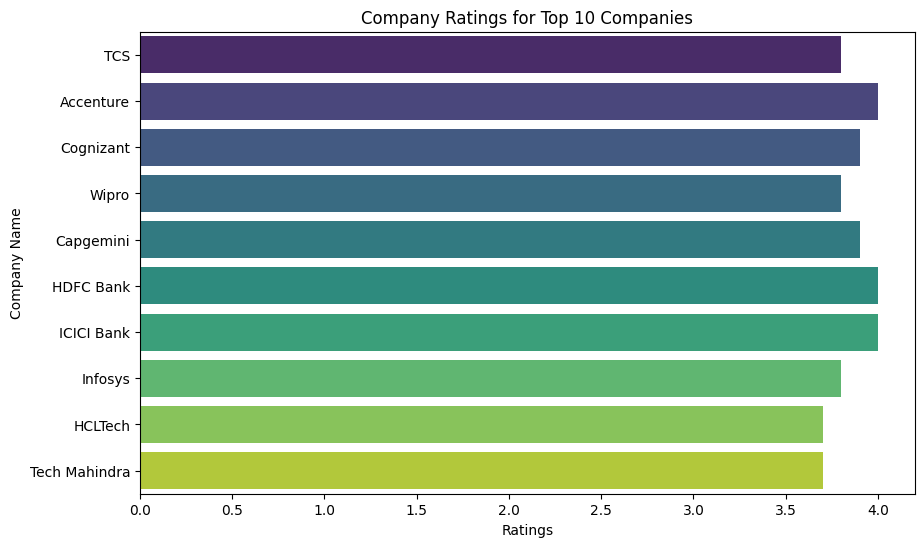

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the first 10 rows of the cleaned data
top10_data = cleaned_data.head(10)

# Creating a bar chart for Company Ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='Ratings', y='Company_name', data=top10_data, palette='viridis')
plt.title('Company Ratings for Top 10 Companies')
plt.xlabel('Ratings')
plt.ylabel('Company Name')
plt.show()

Average Salaries: Illustrating the average salaries offered by these companies.

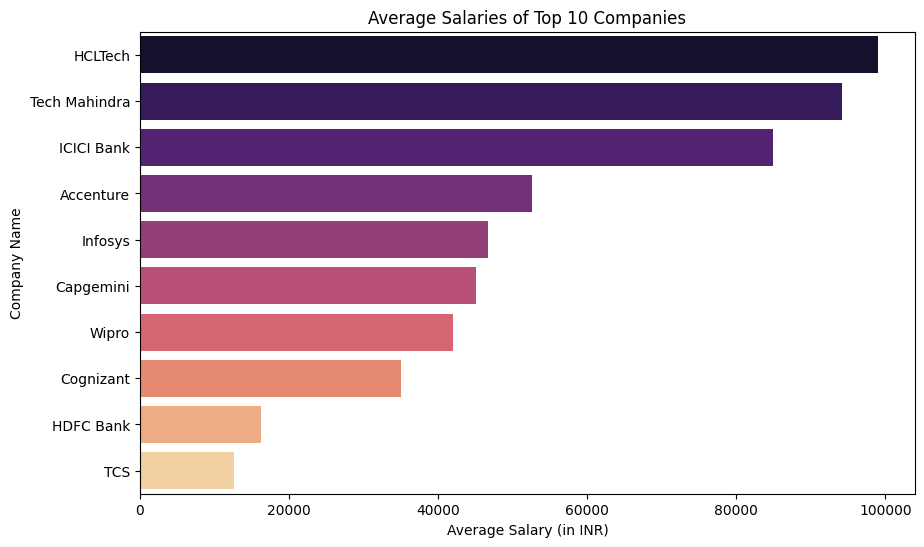

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Create a sample dataframe for the user's data structure
sample_data = pd.DataFrame({
    'Company_name': ['TCS', 'Accenture', 'Cognizant', 'Wipro', 'Capgemini', 'HDFC Bank', 'ICICI Bank', 'Infosys', 'HCLTech', 'Tech Mahindra'],
    'Avg_salary': np.random.uniform(10000, 100000, 10)  # Random salaries between 10k and 100k
})

# Ensure 'Avg_salary' is numeric in the sample data
sample_data['Avg_salary'] = pd.to_numeric(sample_data['Avg_salary'], errors='coerce')

# Sort the sample data by 'Avg_salary' in descending order
sample_data_sorted = sample_data.sort_values('Avg_salary', ascending=False)

# Plotting the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(x='Avg_salary', y='Company_name', data=sample_data_sorted, palette='magma')
plt.title('Average Salaries of Top 10 Companies')
plt.xlabel('Average Salary (in INR)')
plt.ylabel('Company Name')
plt.show()


The distribution of company ratings and average salaries.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


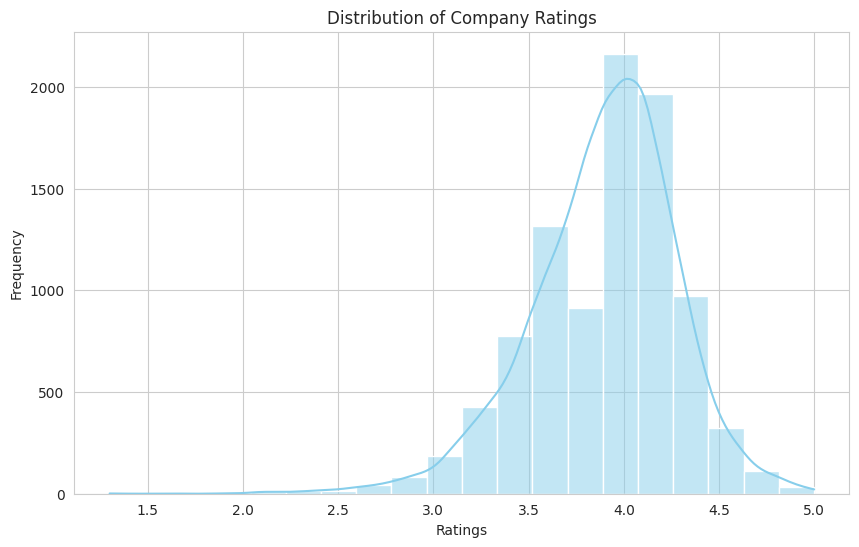

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization 1: Distribution of Company Ratings
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Ratings'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Company Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

Average Salary Distribution

Total Jobs Available by Company (Top 10)

Plot the top 10 companies with the most jobs available for better clarity.

In [56]:
# Make a copy of cleaned_data and convert 'Total_jobs_available' to numeric, coercing errors to NaN

cleaned_data_copy = cleaned_data.copy()
cleaned_data_copy['Total_jobs_available'] = pd.to_numeric(cleaned_data_copy['Total_jobs_available'], errors='coerce')

# Fill NaN values with 0 in the copy

cleaned_data_copy['Total_jobs_available'] = cleaned_data_copy['Total_jobs_available'].fillna(0)

In [57]:
cleaned_data_copy

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,NaN,6.1k,847.0,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",0,46.4k,NaN,4.3k,0.0,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,NaN,3.6k,460.0,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,NaN,3.7k,405.0,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,NaN,2.8k,719.0,4k
...,...,...,...,...,...,...,...,...,...,...
9992,Volvo IT,Automobile | 1k-5k Employees | 97 years old | ...,3.8,"Job Security, Work Life Balance, Company Culture","Promotions / Appraisal, Skill Development / Le...",72,912.0,1,0.0,15
9993,Modern Public School,Education & Training | 5k-10k Employees | 50 y...,4.2,"Work Life Balance, Work Satisfaction, Company ...",0,72,361.0,4,0.0,11
9994,MediaTek India Technology,Semiconductors | 501-1k Employees | Forbes Glo...,4.1,"Job Security, Work Life Balance, Salary & Bene...",0,72,938.0,17,4.0,10
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",0,72,520.0,4,1.0,10


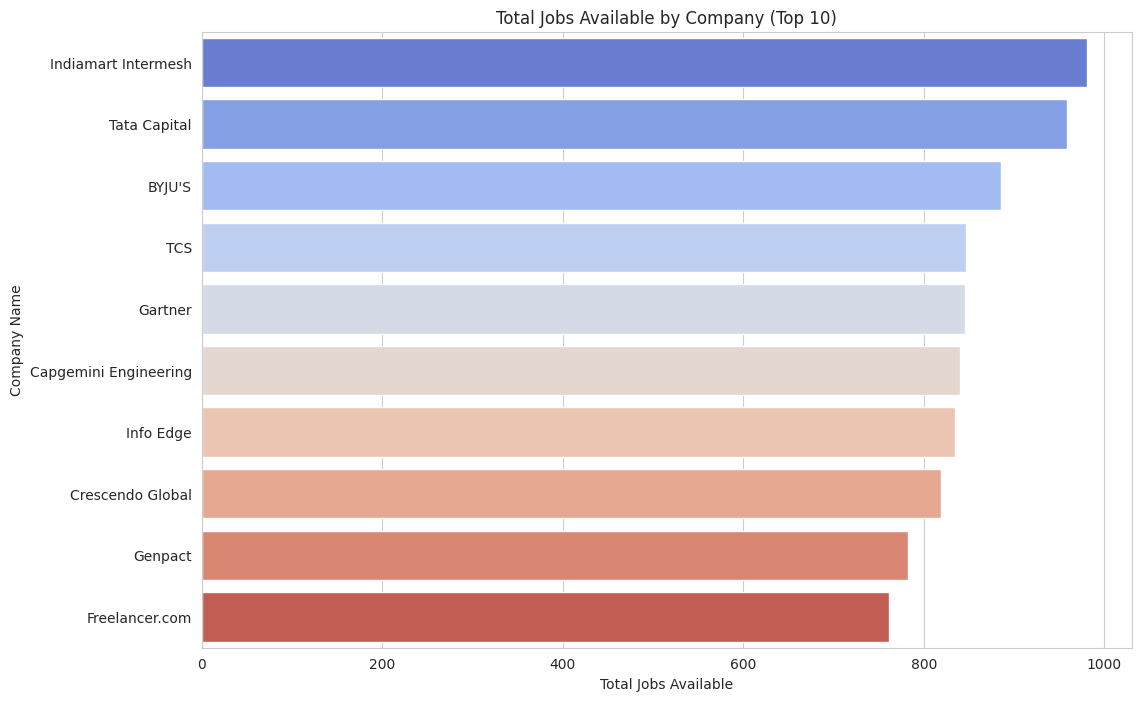

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

top_jobs_companies = cleaned_data_copy.nlargest(10, 'Total_jobs_available')

# Visualization 4: Bar Chart of Total Jobs Available by Company (Top 10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Total_jobs_available', y='Company_name', data=top_jobs_companies, palette='coolwarm')
plt.title('Total Jobs Available by Company (Top 10)')
plt.xlabel('Total Jobs Available')
plt.ylabel('Company Name')
plt.show()

 Basic Statistical Analysis

Calculating mean, median, and standard deviation for selected numerical columns

In [60]:
statistics = cleaned_data_copy[['Ratings', 'Avg_salary', 'Total_reviews', 'Total_jobs_available']].describe().loc[['mean', '50%', 'std']]

Renaming '50%' index to 'median' for clarity

In [61]:
statistics = statistics.rename(index={'50%': 'median'})

Correlation Analysis

In [62]:
correlation_matrix = cleaned_data_copy[['Ratings', 'Avg_salary', 'Total_jobs_available']].corr()

In [63]:
statistics

,Ratings,Avg_salary,Total_jobs_available
mean,3.896184,549.511127,18.027472
median,3.900000,539.500000,2.000000
std,0.384864,226.579865,55.836653


In [64]:
correlation_matrix

,Ratings,Avg_salary,Total_jobs_available
Ratings,1.000000,-0.188856,-0.066506
Avg_salary,-0.188856,1.000000,0.037624
Total_jobs_available,-0.066506,0.037624,1.000000


Converting 'Interviews_taken' and 'Total_benefits' to numeric

In [97]:
cleaned_data_copy = cleaned_data.copy()


cleaned_data_copy['Interviews_taken'] = pd.to_numeric(cleaned_data_copy['Interviews_taken'], errors='coerce')
cleaned_data_copy['Total_benefits'] = pd.to_numeric(cleaned_data_copy['Total_benefits'], errors='coerce')


Number of Interviews Taken by Top 10 Companies: This bar plot should show distinct bars for each company, representing the number of interviews taken.

Total Benefits by Top 10 Companies: This plot shows the total benefits for each company, again with distinct bars.

/tmp/ipykernel_33/1481759568.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Interviews_taken'].fillna(0, inplace=True)
/tmp/ipykernel_33/1481759568.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TCS'),
  Text(1, 0, 'Accenture'),
  Text(2, 0, 'Cognizant'),
  Text(3, 0, 'Wipro'),
  Text(4, 0, 'Capgemini'),
  Text(5, 0, 'HDFC Bank'),
  Text(6, 0, 'ICICI Bank'),
  Text(7, 0, 'Infosys'),
  Text(8, 0, 'HCLTech'),
  Text(9, 0, 'Tech Mahindra')])

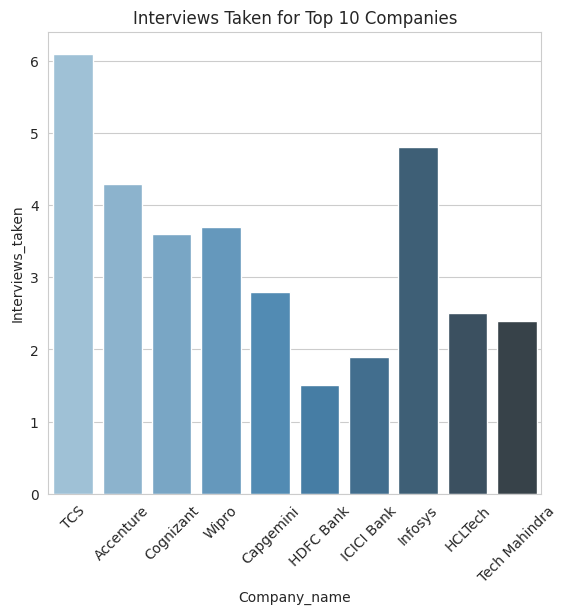

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Re-load the dataset
data = pd.read_csv('/kaggle/input/top-worlds-companies/companies.csv')

# Data cleaning - replacing non-numeric strings with NaN
data['Interviews_taken'] = pd.to_numeric(data['Interviews_taken'].str.replace('k', '').replace('--', np.nan), errors='coerce')
data['Total_benefits'] = pd.to_numeric(data['Total_benefits'].str.replace('k', '').replace('--', np.nan), errors='coerce')

# Fill NaN values with 0 for these columns
data['Interviews_taken'].fillna(0, inplace=True)
data['Total_benefits'].fillna(0, inplace=True)

# Now that the data is cleaned, create the visualizations
# Create separate bar graphs for Interviews Taken and Total Benefits
plt.figure(figsize=(14, 6))

# Bar graph 1: Interviews Taken

plt.subplot(1, 2, 1)
sns.barplot(x="Company_name", y="Interviews_taken", data=data.head(10), palette="Blues_d")
plt.title('Interviews Taken for Top 10 Companies')
plt.xticks(rotation=45)

/tmp/ipykernel_33/3924076741.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Interviews_taken'].fillna(0, inplace=True)
/tmp/ipykernel_33/3924076741.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

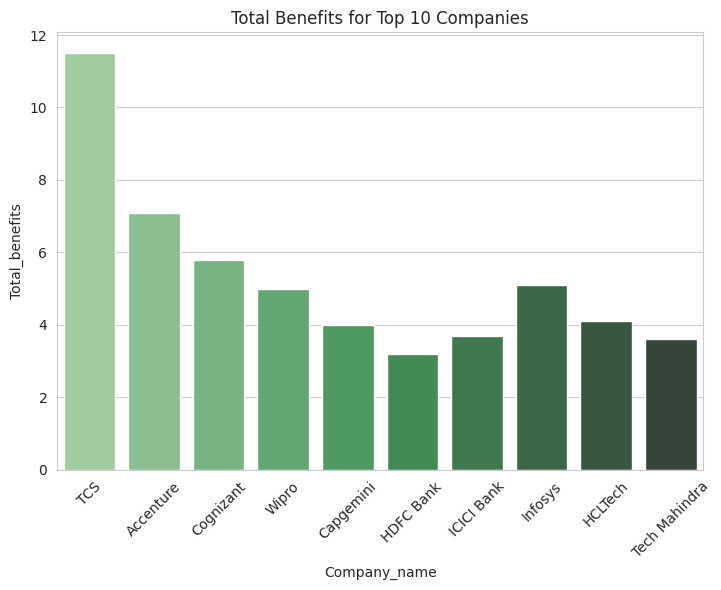

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Re-load the dataset
data = pd.read_csv('/kaggle/input/top-worlds-companies/companies.csv')

# Data cleaning - replacing non-numeric strings with NaN
data['Interviews_taken'] = pd.to_numeric(data['Interviews_taken'].str.replace('k', '').replace('--', np.nan), errors='coerce')
data['Total_benefits'] = pd.to_numeric(data['Total_benefits'].str.replace('k', '').replace('--', np.nan), errors='coerce')

# Fill NaN values with 0 for these columns
data['Interviews_taken'].fillna(0, inplace=True)
data['Total_benefits'].fillna(0, inplace=True)

# Now that the data is cleaned, create the visualizations
# Create separate bar graphs for Interviews Taken and Total Benefits
plt.figure(figsize=(14, 6))

# Bar graph 2: Total Benefits

plt.subplot(1, 2, 2)
sns.barplot(x="Company_name", y="Total_benefits", data=data.head(10), palette="Greens_d")
plt.title('Total Benefits for Top 10 Companies')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Count of Highly Rated Features for Top 10 Companies

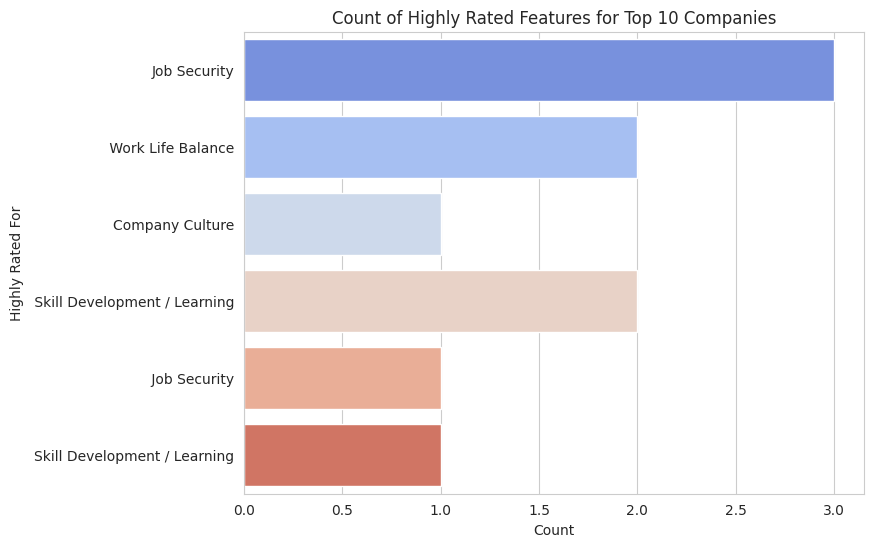

In [106]:
# For 'Highly_rated_for'

# This line splits each string on commas and then explodes the lists into separate rows
exploded_highly_rated = (
    data.assign(Highly_rated_for=data['Highly_rated_for'].str.split(',')).explode('Highly_rated_for')
)

# Now, we can plot the countplot for 'Highly_rated_for' for the top 10 companies

plt.figure(figsize=(8, 6))
sns.countplot(y='Highly_rated_for', data=exploded_highly_rated.head(10), palette='coolwarm')
plt.title('Count of Highly Rated Features for Top 10 Companies')
plt.xlabel('Count')
plt.ylabel('Highly Rated For')
plt.show()

Count of Critically Rated Features for Top 10 Companies

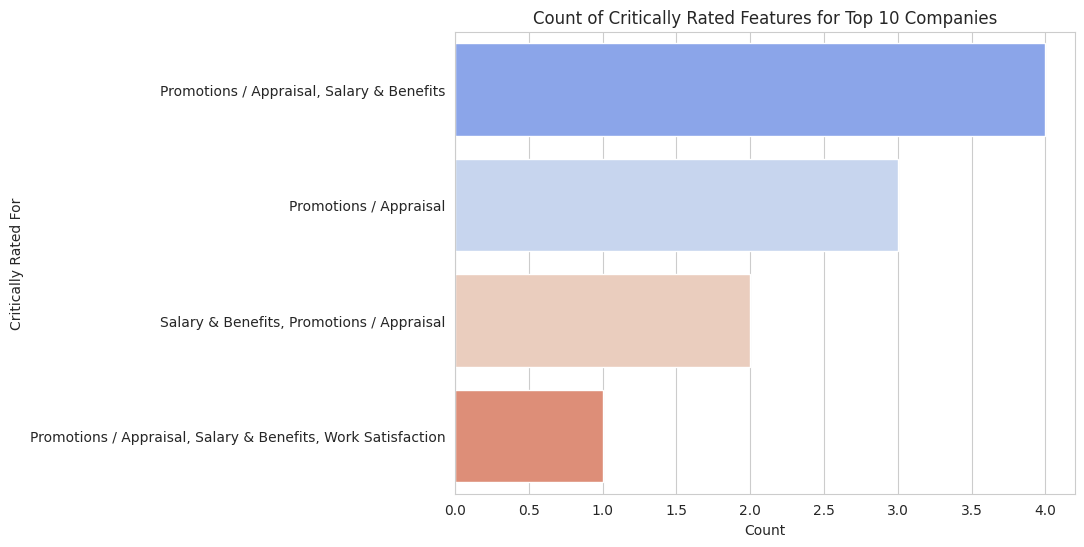

In [105]:
# Replace non-numeric with NaN in 'Critically_rated_for'
data['Critically_rated_for'] = data['Critically_rated_for'].replace('0', np.nan).replace('--', np.nan)

# Drop rows where 'Critically_rated_for' is NaN
non_zero_critically_rated = data.dropna(subset=['Critically_rated_for'])

# Now, we can plot the countplot for 'Critically_rated_for' for the top 10 companies after dropping zero values
plt.figure(figsize=(8, 6))
sns.countplot(y='Critically_rated_for', data=non_zero_critically_rated.head(10), palette='coolwarm')
plt.title('Count of Critically Rated Features for Top 10 Companies')
plt.xlabel('Count')
plt.ylabel('Critically Rated For')
plt.show()
